# Описание проекта

Заказчик — кредитный отдел банка, прислал статистику о платежеспособности клиентов.  <br>
Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. А так же ответить на вопрос: как доходы клиента и цели кредита влияют на возврат в срок?<br>
Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

# Описание данных
- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

### Шаг 1. Изучение общей информации о данных.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# чтение файла с данными и сохранение в df
df = pd.read_csv('data.csv')

# получение первых строк таблицы df
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [3]:
# получение общей информации о данных в таблице df
df.info()

# подсчёт пропусков
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

По первым строкам мы видим несколько проблем с данными.<br>
В столбце 'days_employed' есть отрицательные значения. По логике трудовой стаж в днях не может быть как отрицательным, так и иметь много знаков после запятой. <br>
В столбце 'education' нет единого стиля написания. <br>
В столбце 'purpose' произвольный стиль написания.<br>
В двух столбцах 'days_employed' и 'total_income' есть пропущеные значения.

### Шаг 2. Предобработка данных.

In [4]:
# Подсчет количества пропущенных значений
(df.isna().mean()*100).round(2)

children             0.0
days_employed       10.1
dob_years            0.0
education            0.0
education_id         0.0
family_status        0.0
family_status_id     0.0
gender               0.0
income_type          0.0
debt                 0.0
total_income        10.1
purpose              0.0
dtype: float64

В обоих столбцах пропущено более 10% строк. Это довольно большое количество. 

По своему опыту могу сказать, что трудовой стаж некоторые клиенты не указывают сознательно. Считая, что возраст за них все скажет сам. Или что они толком не знают как стаж считать. Ведь могут быть различные повышающие коэффициенты в работе. К примеру, за риск, сложность, опасность работ...

Возможно, что в этих данных приведен трудовой стаж в виде результатов вычислений. Тогда мы смело можем утверждать, что одного из слагаемы в формуле нет. Отсюда и пропуск.

Так же есть вариант ошибки оператора при создании этого файла. 

Есть вероятность автоматической ошибки считывания данных, если подчерк клиента был неразборчивый.

In [5]:
# Вычисление среднего и медианы
print('Медиана:',df['total_income'].median())
print('Среднее:', df['total_income'].mean())

Медиана: 145017.93753253992
Среднее: 167422.30220817294


In [6]:
# Заполнение пропущенных строк в столбце total_income медианным значением.
df['total_income'] = df['total_income'].fillna(df['total_income'].median())
df['total_income'].isna().sum()

0

In [7]:
# Исследование столбцов children, gender, dob_years, days_employed
print('children', sorted(df['children'].unique()))
print('gender', sorted(df['gender'].unique()))
print('dob_years', sorted(df['dob_years'].unique()))

children [-1, 0, 1, 2, 3, 4, 5, 20]
gender ['F', 'M', 'XNA']
dob_years [0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


In [8]:
# Просмотр количества кредитов по количеству детей
display('children', df.groupby('children')['debt'].count())

'children'

children
-1        47
 0     14149
 1      4818
 2      2055
 3       330
 4        41
 5         9
 20       76
Name: debt, dtype: int64

В столбце 'children' есть отрицательное значение. Теоретически можно указать в случае непоправимых событий, что детей теперь -1. Но все таки врядли эту информацию будут офишировать и передавать банку. Поэтому я принял решение, что эта ошибка оператора или системы не критична и эти данные можно сгруппировать с данными по 1 ребенку. Тем более, что 47 строк на фоне 14 149 не сильно повлияют на конечный результат исследования. Их доля очень мала. В столбце есть значение 20. Теоретически такая семья может быть, но взятых кредитов в этой выборке больше чем в семьях с 4 и 5 детьми вместе взятыми. Так что принято решение считать выборку с 20 детьми аномалией. <br>
Скорее всего оператор, когда нажимала клавиши, ошиблась. Кнопки '0' и '2' смежные. Данные могут принадлежать как одной так и второй выборке. Мы не можем с уверенностью их присоединить ни к варианту бездетных заемщиков, так и к варианту с 2 детьми. А даже если и присоединить, то на фоне количества кредитов как одних так и других, выборка изменится в пределах 3,6%. Об обнаруженной аномалии имеет смысл сообщить заказчику. Быть может эти данные они пересмотрят.<br>
Я принимаю решение проигнорировать данные по выборке в 20 детей в ходе дальнейшего исследования.<br>
В столбцах 'gender' и 'dob_years' есть выпадающие из общей картины данные. Пол заемщика для нашего исследования не имеет значения. Количество лет "0" немного настораживает. Скорее всего имелось ввиду количество лет с момента, как человек может подать заявку на кредит. Но в нашем исследовании возраст заемщиков не рассматривается, поэтому данные в этих двух столбцах я оставляю без изменений.<br>
В столбце 'days_employed' находятся как положительные, так и отрицательные значения. Поскольку общий трудовой стаж в днях не может быть отрицательным, принято решение перевести эти числа в положительный вид. Не понятно как количество дней может иметь дробную часть. Так же смущает сама целая часть. Такое ощущение, что здесь данные приведены не в том формате, что указан в задании. Далее этот столбец не участвует в исследовании, поэтому и пропущенные в нем значения мы не будем как-то обрабатывать. 

In [9]:
# Приведение столбца 'days_employed' в положительный вид. 
df['days_employed'] = abs(df['days_employed'])

# Замена вещественного типа данных в столбце total_income на целочисленный.
df['total_income'] = df['total_income'].astype(int)

# Перевод строк в столбце "education" в нижний регистр
df['education'] = df['education'].str.lower()

# Приведение столбца 'children' в положительный вид. 
df['children'] = abs(df['children'])

# Поиск дубликатов
df.duplicated().sum()

71

In [10]:
# Удаление дубликатов
df = df.drop_duplicates().reset_index(drop=True)
df.duplicated().sum()

0

In [11]:
# Создание таблицы со столбцами 'education' и 'education_id'
df_education = df[['education', 'education_id']]

# Поиск дубликатов
df_education.duplicated().sum()

# Удаление дубликатов
df_education = df_education.drop_duplicates().reset_index(drop=True)
df_education.duplicated().sum()

display(df_education)

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


In [12]:
# Создание таблицы со столбцами 'family_status' и 'family_status_id'

df_family = df[['family_status', 'family_status_id']]

# Поиск дубликатов
df_family.duplicated().sum()

# Удаление дубликатов
df_family = df_family.drop_duplicates().reset_index(drop=True)
df_family.duplicated().sum()

display(df_family)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


На основании диапазонов, указанных ниже, создайте столбец total_income_category с категориями: 

0–30000 — 'E'; 

30001–50000 — 'D'; 

50001–200000 — 'C'; 

200001–1000000 — 'B'; 

1000001 и выше — 'A'. 

Например, кредитополучателю с доходом 25000 нужно назначить категорию 'E', а клиенту, получающему 235000, — 'B'.

In [13]:
# Создание столбца total_income_category 
for z in range(len(df['total_income'])):
    if 0 < df.loc[z,'total_income'] <= 30000:
        df.loc[z, 'total_income_category'] = 'E'
    elif 30001 <= df.loc[z,'total_income'] <= 50000:
        df.loc[z, 'total_income_category'] = 'D'
    elif 50001 <= df.loc[z,'total_income'] <= 200000:
        df.loc[z, 'total_income_category'] = 'C'
    elif 200001 <= df.loc[z,'total_income'] <= 1000000:
        df.loc[z, 'total_income_category'] = 'B'
    elif df.loc[z,'total_income'] >= 1000001:
        df.loc[z, 'total_income_category'] = 'A'

In [14]:
# Просмотр уникальных значений в столбце 'purpose'
sorted(df['purpose'].unique())

['автомобили',
 'автомобиль',
 'высшее образование',
 'дополнительное образование',
 'жилье',
 'заняться высшим образованием',
 'заняться образованием',
 'на покупку автомобиля',
 'на покупку подержанного автомобиля',
 'на покупку своего автомобиля',
 'на проведение свадьбы',
 'недвижимость',
 'образование',
 'операции с жильем',
 'операции с коммерческой недвижимостью',
 'операции с недвижимостью',
 'операции со своей недвижимостью',
 'покупка жилой недвижимости',
 'покупка жилья',
 'покупка жилья для сдачи',
 'покупка жилья для семьи',
 'покупка коммерческой недвижимости',
 'покупка недвижимости',
 'покупка своего жилья',
 'получение высшего образования',
 'получение дополнительного образования',
 'получение образования',
 'приобретение автомобиля',
 'профильное образование',
 'ремонт жилью',
 'свадьба',
 'свой автомобиль',
 'сделка с автомобилем',
 'сделка с подержанным автомобилем',
 'строительство жилой недвижимости',
 'строительство недвижимости',
 'строительство собственной недв

In [15]:
# Функция, которая на основании данных из столбца purpose сформирует новый столбец purpose_category.

def pc(data_in):
    if data_in.find('авто') != -1:
        return 'операции с автомобилем'
    elif data_in.find('свадьб') != -1:
        return 'проведение свадьбы'
    elif data_in.find('образован') != -1:
        return 'получение образования'
    else:
        return 'операции с недвижимостью'
    
# Цикл для создания столбца 'purpose_category'
for i in range(len(df['purpose'])):
    df.loc[i, 'purpose_category'] = pc(df.loc[i, 'purpose'])

In [16]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы


### Шаг 3. Исследование.

#### 3.1 Проверка зависимости между количеством детей и возвратом кредита в срок.

In [17]:
# Из исходной таблицы игнорируем данные с 20-ю детьми
debt_ch = df[df['children'] != 20]

# В табллицу debt_all_ch групировка исходной таблицы по столбцу 'children' с подсчетом количества выданных кредитов.
debt_all_ch = debt_ch.groupby('children')['debt'].count().reset_index()

# В столбец 'debt_not' групировка количества не возвращенных кредитов.
debt_all_ch['debt_not'] = debt_ch[debt_ch['debt'] == 1].groupby('children')['debt'].count()

# В столбец 'debt_percent' подсчитано в % количества не выданных кредитов.
debt_all_ch['debt_percent'] = (debt_all_ch['debt_not']*100/debt_all_ch['debt']).round(2)

debt_all_ch

,children,debt,debt_not,debt_percent
0,0,14091,1063.0,7.54
1,1,4855,445.0,9.17
2,2,2052,194.0,9.45
3,3,330,27.0,8.18
4,4,41,4.0,9.76
5,5,9,NaN,NaN


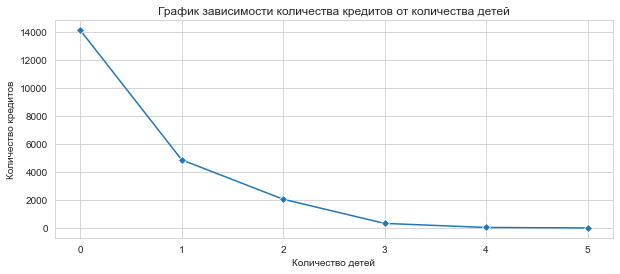

In [18]:
# Применение стиля whitegrid из библиотеки seaborn
sns.set_style('whitegrid')

# Размер графика
plt.figure(figsize=(10, 4))

# Строим линейный график 
sns.lineplot(x='children', y='debt', data=debt_all_ch, marker='D')

# Формируем заголовок графика и подписи осей 
plt.title('График зависимости количества кредитов от количества детей')
plt.xlabel('Количество детей')
plt.ylabel('Количество кредитов')
plt.show()

Не смотря на то, что с увеличением количества детей % не возвращаемых кредитов возрастает, нельзя сделать однозначный вывод.<br>
В строке с 5 детьми нет не возвращенных кредитов.<br>
По данным видна зависимость количества кредитов от количества детей. Чем больше детей, тем меньше кредитов. <br>
Мы получили отсутствие зависимости в процентах от общего количества выданных кредитов. Разброс от 7,5% у бездетных до 9,76% у семей с 4 детьми. Разница в почти 2%. В то время как все клиенты с 5 детьми не имеют невозвратов. Бездетные возвращают кредит чаще чем семьи с детьми, если не брать во внимание данные по семьям с 5 детьми. 

#### 3.2 Проверка зависимости между семейным положением и возвратом кредита в срок.

In [19]:
# В таблицу debt_all_f групировка исходной таблицы по столбцу 'family_status_id' с подсчетом количества выданных кредитов.
debt_all_f = df.groupby('family_status_id')['debt'].count().reset_index()

# В столбец 'debt_not' групировка количества не возвращенных кредитов.
debt_all_f['debt_not'] = df[df['debt'] == 1].groupby('family_status_id')['debt'].count()

# В столбец 'debt_percent' подсчитано в % количества не выданных кредитов.
debt_all_f['debt_percent'] = (debt_all_f['debt_not']*100/debt_all_f['debt']).round(2)

debt_all_f

,family_status_id,debt,debt_not,debt_percent
0,0,12339,931,7.55
1,1,4151,388,9.35
2,2,959,63,6.57
3,3,1195,85,7.11
4,4,2810,274,9.75


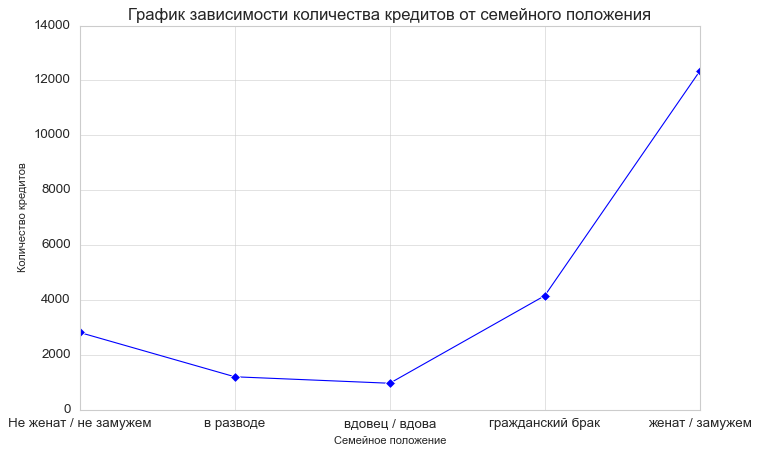

In [28]:
# Применение стиля whitegrid из библиотеки seaborn
sns.set_style('whitegrid')

# Размер графика
plt.figure(figsize=(10, 6))

# Строим линейный график 
sns.lineplot(x='family_status', y='debt', data=df.groupby('family_status')['debt'].count().reset_index(), marker='D')

# Формируем заголовок графика и подписи осей 
plt.title('График зависимости количества кредитов от семейного положения', fontsize=15)
plt.xlabel('Семейное положение', fontsize=10)
plt.ylabel('Количество кредитов', fontsize=10)
plt.show()

Из полученных результатов мы видим, что разброс невозвратов кредитов по категориям в процентном соотношении колеблется от 6,5% до 9,76%. Это довольно большой разброс. <br>
Больше всего берут кредитов супруги в браке. Они же больше всего не возвращают в абсолютных цифрах. В то же время в процентном соотношении это всего 7,54% невозвратов.<br>
На втором месте по количеству кредитов лица в гражданском браке. У них 9,34% невозвратов.<br>
Меньше всего берут кредиты вдовы/вдовцы. И они же имеют самый низкий процент невозвратов - 6,57%<br>
Не далеко от них ушли и разведенные - 7,12% невозвратов.<br>
А вот не обремененные браком лица берут кредиты не очень часто, но возвращают хуже всего. Процент не возврата самый высокий - 9,75%<br>
По полученным данным делаем вывод: супруги, вдовы, вдовцы и разведенные клиенты являются самыми надежными заемщиками. В то время как лица в гражданском браке и холостые чаще не возвращают кредиты.

#### 3.3 Проверка зависимости между уровнем дохода и возвратом кредита в срок.

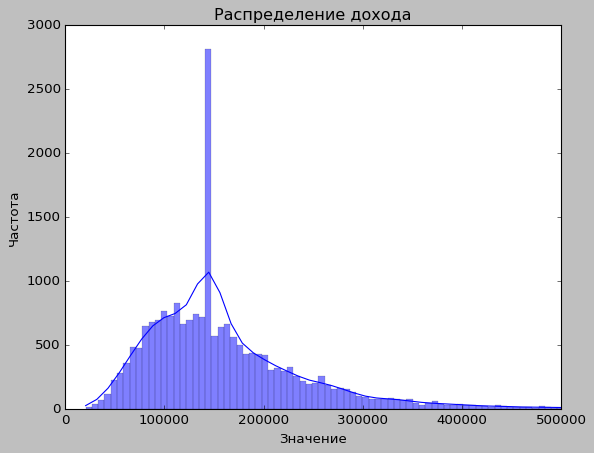

In [21]:
# Назначаем классический стиль для графика с помощью matplotlib
plt.style.use('classic')

# Строим гистограмму для столбца total_income, добавив график кривой KDE
sns.histplot(x='total_income', data=df, kde=True)

# Ограничиваем ось X для наглядности
plt.xlim(0, 500000)

# Указываем заголовок графика и подписи осей средствами matplotlib
plt.title('Распределение дохода')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

In [22]:
# Групировка исходной таблицы по столбцу 'total_income_category' с подсчетом количества выданных кредитов.
df.groupby('total_income_category')['debt'].count().reset_index()

,total_income_category,debt
0,A,25
1,B,5041
2,C,16016
3,D,350
4,E,22


In [23]:
# Подсчет в % количества не выданных кредитов.
(
    df[df['debt'] == 1]
    .groupby('total_income_category')['debt']
    .count() * 100 / df
    .groupby('total_income_category')['debt']
    .count()
).round(2).reset_index()

,total_income_category,debt
0,A,8.00
1,B,7.06
2,C,8.49
3,D,6.00
4,E,9.09


Больше всего кредитов берут люди с доходом 'C': 50 001 - 200 000 и в диапазоне 'B': 200 001 - 1 000 000. <br>
В то время как люди с малым доходом и очень большим кредитами пользуются реже.<br>
Разброс значений невозвратов в пределах от 6% до 9,1% довольно большой. Но если объединить крайние выборки с соседними, картина изменится. Если отбросить значения для выборок 'A' и 'E', будет видно, что хуже всего с возвратом дело обстоит в категории 'C'

#### 3.4 Проверка зависимости целей кредита и возвратом его в срок.

In [24]:
# Групировка исходной таблицы по столбцу 'purpose_category' с подсчетом количества выданных кредитов.
df.groupby('purpose_category')['debt'].count().reset_index()

,purpose_category,debt
0,операции с автомобилем,4306
1,операции с недвижимостью,10811
2,получение образования,4013
3,проведение свадьбы,2324


In [25]:
# Подсчет в % количества не выданных кредитов.
(
    df[df['debt'] == 1]
    .groupby('purpose_category')['debt']
    .count() * 100 / df
    .groupby('purpose_category')['debt']
    .count()
).round(2).reset_index()

,purpose_category,debt
0,операции с автомобилем,9.36
1,операции с недвижимостью,7.23
2,получение образования,9.22
3,проведение свадьбы,8.00


Лучше всего возвращают кредиты на недвижимость. <br>
В то время как кредиты на образование и покупку автомобиля возвращают хуже всего.<br>
Разброс результатов от 7,2% до 9,4% не большой. Но все таки показательный. На свадьбу берут кредитов меньше чем на недвижимость, но возвращают хуже. А вот автомобильные и образовательные кредиты имеют примерно одинаковую картину невозвратов.

#### 3.5 Проверка зависимости уровня образования и возвратом кредита в срок.

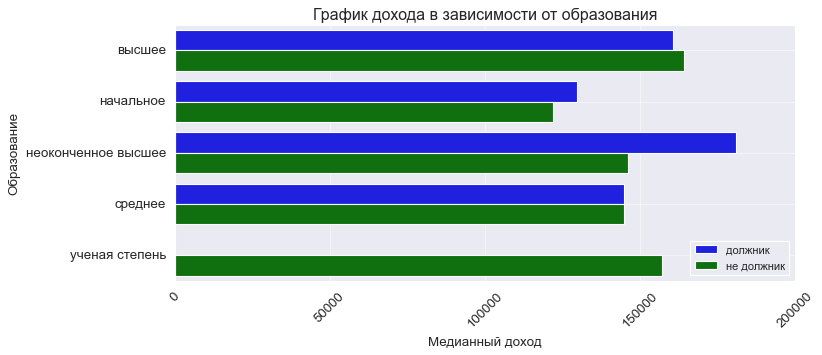

In [29]:
# Cтолбец с меткой о задолженности заменяем на более читаемый
df['debt'] = df['debt'].apply(lambda x: 'должник' if x == 1 else 'не должник')

# Группируем данные по образованию и задолженности и считаем медианный доход
df_ed = df.groupby(['education', 'debt'], \
                        as_index = False)[['total_income']].median()

# Используем стиль dark из библиотеки seaborn
sns.set_style('dark')

# Назначаем размер графика
plt.figure(figsize=(10, 4))

# Строим столбчатый график средствами seaborn
sns.barplot(x='total_income', y='education', data=df_ed, hue='debt')

# Формируем заголовок графика и подписи осей средствами matplotlib
plt.title('График дохода в зависимости от образования')
plt.xlabel('Медианный доход')
plt.ylabel('Образование')

# Поворачиваем подписи значений по оси X на 45 градусов
plt.xticks(rotation=45)

# Выбираем положение легенды и указываем размер шрифта
plt.legend(loc='lower right', fontsize=10)

# Добавляем сетку
plt.grid()

# Отображаем график на экране
plt.show()

### Шаг 4. Общий вывод.

В результате полученных данных мы проанализировали влияние на возврат кредита в срок следующих параметров заемщиков: количество детей, семейное положение, уровень дохода и цели кредита.<br>
В ходе исследования после обработки исходных данных были проверены четыре вопроса:<br>
  
- Четкой зависимости невозвратов от количества детей вывести не получилось. Очень большой разброс в полученных результатах.
    
- Зависимость невозвратов от семейного положения оказалась проста: вкусившие трудности семейной жизни люди склонны более ответственно относиться к обязательствам перед банком.

- От уровня дохода невозвраты зависят. Рекомендую пересмотреть параметры выборок.
    
- Есть зависимость количества невозвратов от целей кредита. Более ответственно люди относятся к кредитам на покупку недвижимости.

- Среди людей с ученой степенью должников нет.

Полученные данные не позволяют сделать однозначный вывод. Некоторые данные не дают четкой картины.<br>
Вдовец с ученой степенью с доходом 30 001 - 50 000, имеющий 5 детей с самой высокой долей вероятности вернет кредит на недвижимость.<br>
В то время как холостяк с 20 детьми с доходом до 30 000 врядли вернет кредит на автомобиль.